### fix json format

In [3]:
import os
import json

def fix_json_file(file_path):
    try:
        with open(file_path, "r") as f:
            lines = f.readlines()

        # Parse each JSON line individually
        data = [json.loads(line) for line in lines if line.strip()]

        # Save as proper JSON array
        with open(file_path, "w") as f:
            json.dump(data, f, indent=2)

        print(f"✅ Fixed: {os.path.basename(file_path)}")

    except Exception as e:
        print(f"❌ Error in {os.path.basename(file_path)}: {e}")

def fix_json_input(path):
    if os.path.isfile(path) and path.endswith(".json"):
        fix_json_file(path)
    elif os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith(".json"):
                fix_json_file(os.path.join(path, filename))
    else:
        print("❌ Invalid input: Must be a JSON file or a folder containing JSON files.")

# 🔧 Provide either a file or folder path here:
# input_path = "/home/hq6375/Desktop/Code/Multi-Agent-Project/all_400.json"
input_path = "/home/hq6375/Desktop/Code/Multi-Agent-Project/split_json_unbalanced"

fix_json_input(input_path)


✅ Fixed: train_8_seed1337.json
✅ Fixed: train_32_seed1024.json
✅ Fixed: train_64_seed0.json
✅ Fixed: train_16_seed42.json
✅ Fixed: train_4_seed1024.json
✅ Fixed: train_16_seed1337.json
✅ Fixed: train_128_seed1024.json
✅ Fixed: train_32_seed42.json
✅ Fixed: train_2_seed0.json
✅ Fixed: train_64_seed42.json
✅ Fixed: train_8_seed42.json
✅ Fixed: train_64_seed21.json
✅ Fixed: train_4_seed1337.json
✅ Fixed: train_8_seed1024.json
✅ Fixed: train_2_seed1024.json
✅ Fixed: train_4_seed42.json
✅ Fixed: train_32_seed0.json
✅ Fixed: train_32_seed21.json
✅ Fixed: train_2_seed42.json
✅ Fixed: train_4_seed21.json
✅ Fixed: validation.json
✅ Fixed: train_128_seed1337.json
✅ Fixed: train_128_seed42.json
✅ Fixed: train_2_seed21.json
✅ Fixed: train_16_seed1024.json
✅ Fixed: train_8_seed0.json
✅ Fixed: train_64_seed1024.json
✅ Fixed: train_32_seed1337.json
✅ Fixed: test.json
✅ Fixed: train_128_seed0.json
✅ Fixed: train_128_seed21.json
✅ Fixed: train_16_seed0.json
✅ Fixed: train_4_seed0.json
✅ Fixed: train_8_

### Turn 1 to yes and 0 to no

In [4]:
import os
import json

def convert_labels_to_yes_no(file_path):
    try:
        with open(file_path, "r") as f:
            data = json.load(f)

        for item in data:
            if isinstance(item.get("label"), int):
                item["label"] = "yes" if item["label"] == 1 else "no"

        with open(file_path, "w") as f:
            json.dump(data, f, indent=2)

        print(f"✅ Updated: {os.path.basename(file_path)}")

    except Exception as e:
        print(f"❌ Error in {os.path.basename(file_path)}: {e}")

def apply_label_conversion(input_path):
    if os.path.isfile(input_path) and input_path.endswith(".json"):
        convert_labels_to_yes_no(input_path)
    elif os.path.isdir(input_path):
        for filename in os.listdir(input_path):
            if filename.endswith(".json"):
                file_path = os.path.join(input_path, filename)
                convert_labels_to_yes_no(file_path)
    else:
        print("❌ Invalid input: Must be a JSON file or a folder containing JSON files.")

# 🔧 Set your file or folder path here:
# path = "/home/hq6375/Desktop/Code/Multi-Agent-Project/all_400.json"
path = "/home/hq6375/Desktop/Code/Multi-Agent-Project/split_json_unbalanced"

apply_label_conversion(path)


✅ Updated: train_8_seed1337.json
✅ Updated: train_32_seed1024.json
✅ Updated: train_64_seed0.json
✅ Updated: train_16_seed42.json
✅ Updated: train_4_seed1024.json
✅ Updated: train_16_seed1337.json
✅ Updated: train_128_seed1024.json
✅ Updated: train_32_seed42.json
✅ Updated: train_2_seed0.json
✅ Updated: train_64_seed42.json
✅ Updated: train_8_seed42.json
✅ Updated: train_64_seed21.json
✅ Updated: train_4_seed1337.json
✅ Updated: train_8_seed1024.json
✅ Updated: train_2_seed1024.json
✅ Updated: train_4_seed42.json
✅ Updated: train_32_seed0.json
✅ Updated: train_32_seed21.json
✅ Updated: train_2_seed42.json
✅ Updated: train_4_seed21.json
✅ Updated: validation.json
✅ Updated: train_128_seed1337.json
✅ Updated: train_128_seed42.json
✅ Updated: train_2_seed21.json
✅ Updated: train_16_seed1024.json
✅ Updated: train_8_seed0.json
✅ Updated: train_64_seed1024.json
✅ Updated: train_32_seed1337.json
✅ Updated: test.json
✅ Updated: train_128_seed0.json
✅ Updated: train_128_seed21.json
✅ Updated: t

### Plotting ROC

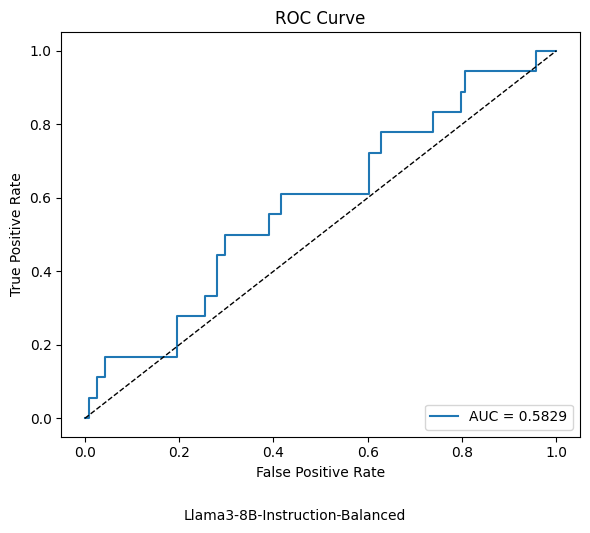

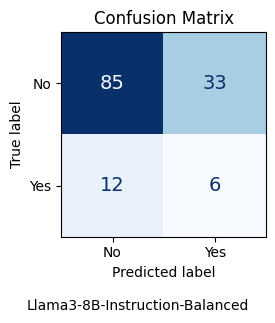

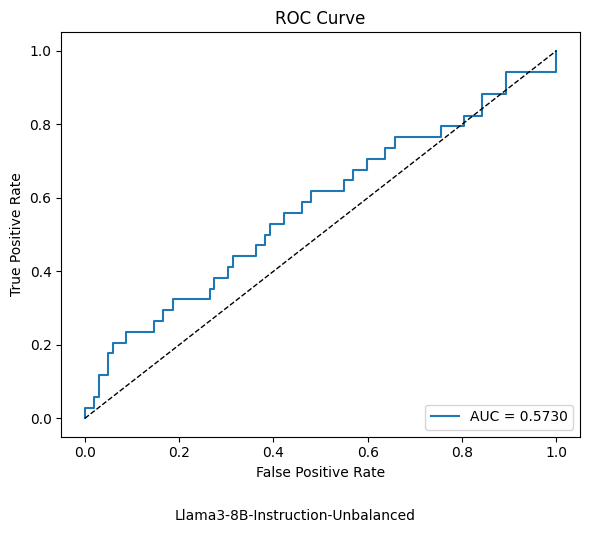

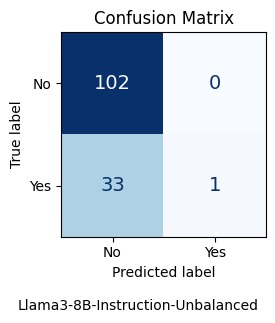

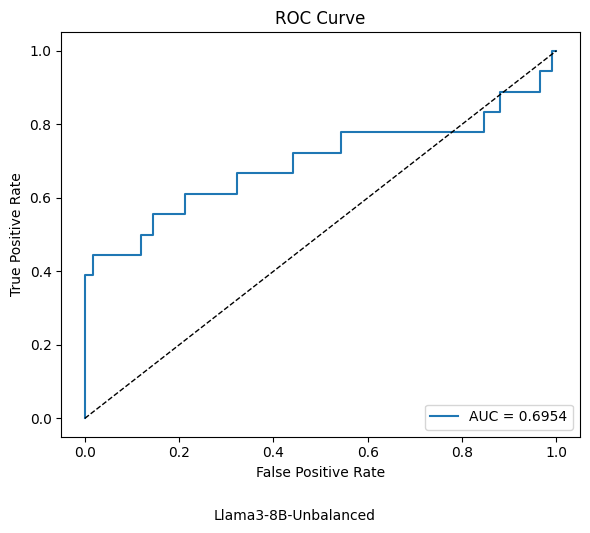

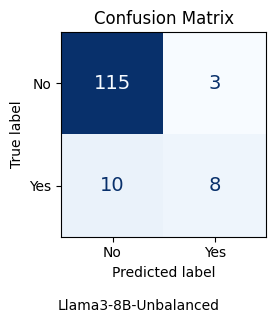

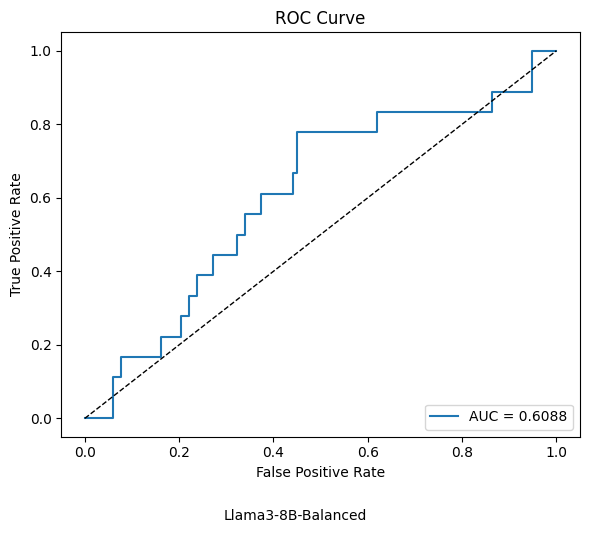

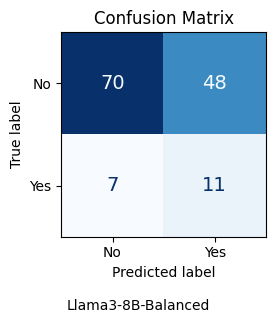

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Folder path
folder_path = "/home/hq6375/Desktop/Code/Multi-Agent-Project/Result-128"

# Loop through each CSV file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # Load CSV
        df = pd.read_csv(file_path)
        y_true = df["Actual Labels"]
        y_scores = df["Yes Probabilities"]

        # Compute ROC
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        # ---- Format Display Name ----
        display_name = "Llama3-8B"
        if "-it" in filename:
            display_name += "-Instruction"
        if "unbalanced" in filename.lower():
            display_name += "-Unbalanced"
        elif "balanced" in filename.lower():
            display_name += "-Balanced"
        
        # Compute confusion matrix at 0.5 threshold
        y_pred = [1 if score >= 0.5 else 0 for score in y_scores]
        cm = confusion_matrix(y_true, y_pred)

        # ---- Plot ROC ----
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.figtext(0.5, -0.05, display_name, wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()

        # ---- Plot Confusion Matrix (smaller box, larger font) ----
        fig, ax = plt.subplots(figsize=(3, 3))  # Smaller plot box
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
        disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=False)
        
        # Enlarge the numbers in the matrix
        for text in disp.text_.ravel():
            text.set_fontsize(14)

        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.figtext(0.5, -0.05, display_name, wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()


### Check distribution of positive to negative

In [1]:
import os
import json

# Folder containing the JSONL files
folder = "/home/hq6375/Desktop/Code/Multi-Agent-Project/split_json_unbalanced"

# Loop through each file in the directory
for filename in os.listdir(folder):
    if filename.endswith(".json") or filename.endswith(".jsonl"):
        filepath = os.path.join(folder, filename)
        pos_count = 0
        neg_count = 0

        with open(filepath, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                label = data.get("label")
                if label == 1:
                    pos_count += 1
                elif label == 0:
                    neg_count += 1

        total = pos_count + neg_count
        pos_ratio = pos_count / total if total > 0 else 0
        print(f"{filename}: Pos={pos_count}, Neg={neg_count}, Pos Ratio={pos_ratio:.2f}")


train_4.json: Pos=1, Neg=3, Pos Ratio=0.25
train_64.json: Pos=16, Neg=48, Pos Ratio=0.25
validation.json: Pos=34, Neg=102, Pos Ratio=0.25
train_32.json: Pos=8, Neg=24, Pos Ratio=0.25
train_2.json: Pos=1, Neg=1, Pos Ratio=0.50
train_8.json: Pos=2, Neg=6, Pos Ratio=0.25
test.json: Pos=34, Neg=102, Pos Ratio=0.25
train_16.json: Pos=4, Neg=12, Pos Ratio=0.25
train_128.json: Pos=32, Neg=96, Pos Ratio=0.25


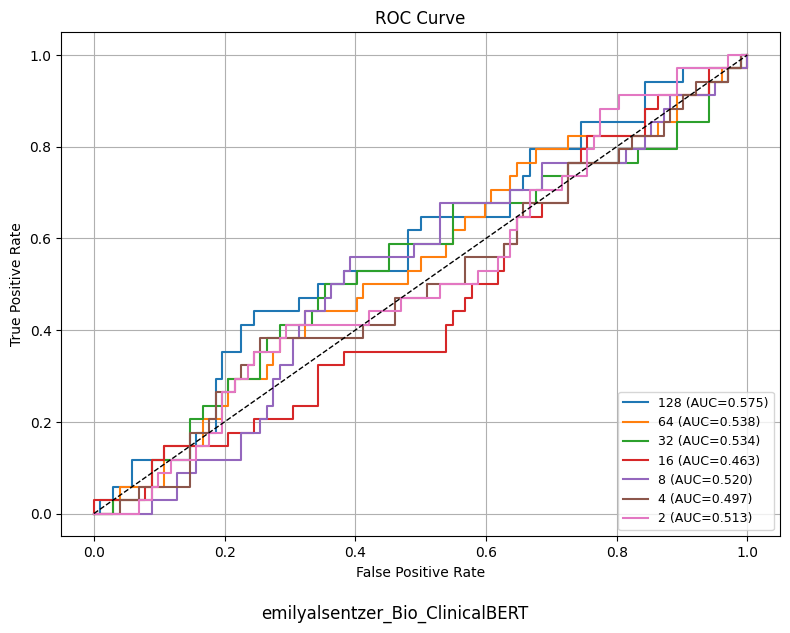

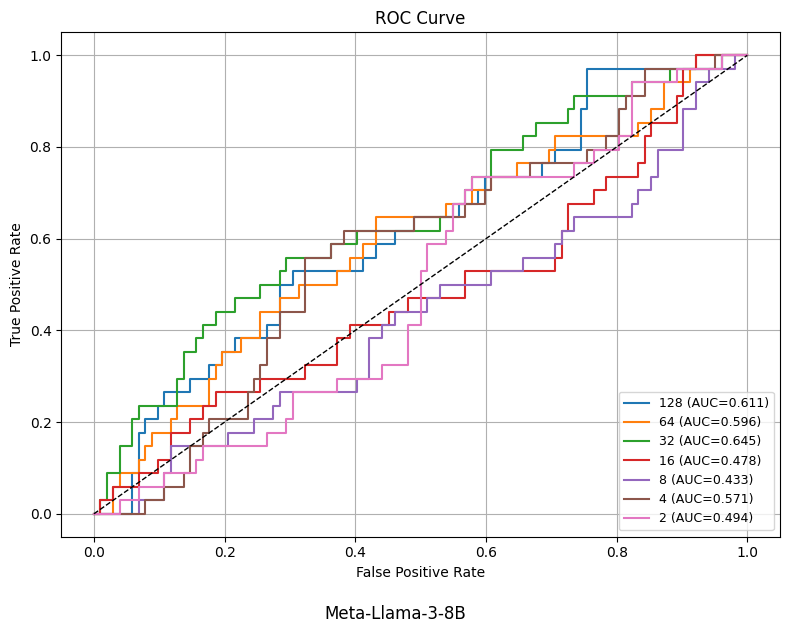

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_model_auroc(base_dir):
    # Iterate over each model subdirectory
    for model_name in os.listdir(base_dir):
        model_path = os.path.join(base_dir, model_name)
        if not os.path.isdir(model_path):
            continue

        plt.figure(figsize=(8, 6))
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")

        curves = []

        for file in os.listdir(model_path):
            if not file.endswith(".csv"):
                continue
            try:
                file_path = os.path.join(model_path, file)
                df = pd.read_csv(file_path)
                y_true = df["Actual Labels"]
                y_score = df["Yes Probabilities"]

                fpr, tpr, _ = roc_curve(y_true, y_score)
                roc_auc = auc(fpr, tpr)

                name = file.replace(".csv", "")
                shot_num = int(name.replace("shots_", ""))  # fix here
                curves.append((shot_num, fpr, tpr, roc_auc))
            except Exception as e:
                print(f"❌ Error processing {file}: {e}")

        # Sort by shot count descending
        curves.sort(reverse=True)

        for shot, fpr, tpr, roc_auc in curves:
            plt.plot(fpr, tpr, label=f"{shot} (AUC={roc_auc:.3f})")

        if curves:
            plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
            plt.legend(loc="lower right", fontsize=9)
            plt.grid(True)
            plt.tight_layout()
            plt.figtext(0.5, -0.04, model_name, ha='center', fontsize=12)
            plt.show()
        else:
            print(f"⚠️ No valid CSVs found in {model_name}")

# Example usage:
plot_model_auroc("/home/hq6375/Desktop/Code/Multi-Agent-Project/results")
